In [1]:
#Confirming that the difference between target sites between biological replicates 
#does not differ from matched control sites



In [2]:
source("/home/users/mcbitter/OrchardProject/Code/config.R")
source("/home/users/mcbitter/OrchardProject/Code/helper_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/load_packages.R")
source("/home/users/mcbitter/OrchardProject/Code/plotting_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/workflow_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/general_cage_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/Orchard2021_Scripts/LOA/loa.orch2021.functions.R")
source("/home/users/mcbitter/OrchardProject/Code/Orchard2021_Scripts/FinalScripts/orch2021_functions.R")
setwd('~/dpetrov/MarkB/Orchard2021Data/16_BiolRepsLOAValidation/')

In [ ]:
#Generate RData files separately for t3 samps/reps and t11 samps/reps
load('./orch2021_Downsampled_BiolReps.RData')
df = cbind(samps, t(afmat))
df = df %>% filter(treatment == 'E')
#t3
df.3 = df %>% filter(tpt == '3' & biol.rep == 'No')
df.3.reps = df %>% filter(tpt == '3' & biol.rep == 'Yes')

#new samps files
samps.3 = df.3[,1:ncol(samps)]
samps.3.reps = df.3.reps[,1:ncol(samps)]

#afmat samples
afmat.3 = df.3[,-c(1:ncol(samps))]
afmat.3 = as.data.frame(t(afmat.3))
#afmat reps
afmat.3.reps = df.3.reps[,-c(1:ncol(samps))]
afmat.3.reps = as.data.frame(t(afmat.3.reps))

save(samps.3, afmat.3, sites, file = './orch2021.t3.RData')
save(samps.3.reps, afmat.3.reps, sites, file = './orch2021.t3.reps.RData')
#t11
df.11 = df %>% filter(tpt == '11' & biol.rep == 'No')
df.11.reps = df %>% filter(tpt == '11' & biol.rep == 'Yes')

#new samps files
samps.11 = df.11[,1:ncol(samps)]
samps.11.reps = df.11.reps[,1:ncol(samps)]

#afmat samples
afmat.11 = df.11[,-c(1:ncol(samps))]
afmat.11 = as.data.frame(t(afmat.11))
#afmat reps
afmat.11.reps = df.11.reps[,-c(1:ncol(samps))]
afmat.11.reps = as.data.frame(t(afmat.11.reps))

save(samps.11, afmat.11, sites, file = './orch2021.t11.RData')
save(samps.11.reps, afmat.11.reps, sites, file = './orch2021.t11.reps.RData')

In [38]:
load('./orch2021.t3.RData')
load('./orch2021.t3.reps.RData')
load('./orch2021.t11.RData')
load('./orch2021.t11.reps.RData')

In [ ]:
##First get beginning to end snps (t->11) shifts at target and matched for pairs of biological reps at time point three and eleven
#t3 shifts
for (loc in unique(samps.3.reps$cage)){
    ##get significant sites file for the focal cage
    df.sig = read.csv(paste0('./df.sig.Matched.ExpandingPhases.LOC', loc, '.10Week.csv'))
    df.sig = df.sig %>% filter(comparison == '1_11')
    target.sites = df.sig %>% dplyr::select(chrom, pos)
    matched.sites = df.sig %>% dplyr::select(chrom, pos.matched) %>% rename(pos = pos.matched)
    #load the loc's two RData files and get shifts at target and matched sites for each
    #t3 shifts
    load('./orch2021.t3.RData')
    load('./orch2021.t3.reps.RData')
    df.3 = cbind(samps.3, t(afmat.3))
    df.3 = df.3 %>% filter(cage == loc)
    df.3.reps = cbind(samps.3.reps, t(afmat.3.reps))
    df.3.reps = df.3.reps %>% filter(cage == loc)
    df.3 = df.3[,-c(1:7)]
    df.3.reps = df.3.reps[,-c(1:7)]
    df.shifts = cbind(t(df.3), t(df.3.reps))
    df.shifts = cbind(sites, df.shifts)
    names(df.shifts) = c('chrom', 'pos', 'samp.freq', 'rep.freq')
    df.shifts.target = left_join(target.sites, df.shifts)
    df.shifts.target = df.shifts.target %>% mutate(dAF.target = samp.freq - rep.freq)
    df.shifts.matched = left_join(matched.sites, df.shifts)
    df.shifts.matched  = df.shifts.matched  %>% mutate(dAF.matched = samp.freq - rep.freq)
    df.shifts.matched = df.shifts.matched %>% rename(pos.matched = pos)
    df.shifts = cbind(df.shifts.target %>% dplyr::select(chrom, pos, dAF.target), df.shifts.matched %>% dplyr::select(pos.matched, dAF.matched))
    df.shifts$LOC = loc
    write.csv(df.shifts, paste0('./df.shifts.BiolReps.t3.', loc, '.SptoFallSNPs.csv'), row.names = FALSE)    
    }

#t11 shifts
for (loc in unique(samps.11.reps$cage)){
    ##get significant sites file for the focal cage
    df.sig = read.csv(paste0('./df.sig.Matched.ExpandingPhases.LOC', loc, '.10Week.csv'))
    df.sig = df.sig %>% filter(comparison == '1_11')
    target.sites = df.sig %>% dplyr::select(chrom, pos)
    matched.sites = df.sig %>% dplyr::select(chrom, pos.matched) %>% rename(pos = pos.matched)
    #load the loc's two RData files and get shifts at target and matched sites for each
    #t3 shifts
    load('./orch2021.t11.RData')
    load('./orch2021.t11.reps.RData')
    df.11 = cbind(samps.11, t(afmat.11))
    df.11 = df.11 %>% filter(cage == loc)
    df.11.reps = cbind(samps.11.reps, t(afmat.11.reps))
    df.11.reps = df.11.reps %>% filter(cage == loc)
    df.11 = df.11[,-c(1:7)]
    df.11.reps = df.11.reps[,-c(1:7)]
    df.shifts = cbind(t(df.11), t(df.11.reps))
    df.shifts = cbind(sites, df.shifts)
    names(df.shifts) = c('chrom', 'pos', 'samp.freq', 'rep.freq')
    df.shifts.target = left_join(target.sites, df.shifts)
    df.shifts.target = df.shifts.target %>% mutate(dAF.target = samp.freq - rep.freq)
    df.shifts.matched = left_join(matched.sites, df.shifts)
    df.shifts.matched  = df.shifts.matched  %>% mutate(dAF.matched = samp.freq - rep.freq)
    df.shifts.matched = df.shifts.matched %>% rename(pos.matched = pos)
    df.shifts = cbind(df.shifts.target %>% dplyr::select(chrom, pos, dAF.target), df.shifts.matched %>% dplyr::select(pos.matched, dAF.matched))
    df.shifts$LOC = loc
    write.csv(df.shifts, paste0('./df.shifts.BiolReps.t11.', loc, '.SptoFallSNPs.csv'), row.names = FALSE)    
    }

In [ ]:
#Next, do this on the 5 time point interval snps, removing the beginning to end snps
#t3 shifts
for (loc in unique(samps.3.reps$cage)){
    ##get significant sites file for t3->11 and the focal cage
    df.sig = read.csv(paste0('./df.sig.Matched.ExpandingPhases.LOC', loc, '.5Week.csv'))
    df.sig = df.sig %>% mutate(snp = paste0(chrom, pos))
    df.be = read.csv(paste0('df.sig.Matched.ExpandingPhases.LOC',loc ,'.10Week.csv'))
    df.be = df.be %>% filter(comparison == '1_11' & FDR < 0.05)  %>% mutate(snp = paste0(chrom, pos))
    df.sig = df.sig %>% filter(!snp %in% df.be$snp)
    target.sites = df.sig %>% dplyr::select(chrom, pos)
    matched.sites = df.sig %>% dplyr::select(chrom, pos.matched) %>% rename(pos = pos.matched)
    #load the loc's two RData files and get shifts at target and matched sites for each
    #t3 shifts
    load('./orch2021.t3.RData')
    load('./orch2021.t3.reps.RData')
    df.3 = cbind(samps.3, t(afmat.3))
    df.3 = df.3 %>% filter(cage == loc)
    df.3.reps = cbind(samps.3.reps, t(afmat.3.reps))
    df.3.reps = df.3.reps %>% filter(cage == loc)
    df.3 = df.3[,-c(1:7)]
    df.3.reps = df.3.reps[,-c(1:7)]
    df.shifts = cbind(t(df.3), t(df.3.reps))
    df.shifts = cbind(sites, df.shifts)
    names(df.shifts) = c('chrom', 'pos', 'samp.freq', 'rep.freq')
    df.shifts.target = left_join(target.sites, df.shifts)
    df.shifts.target = df.shifts.target %>% mutate(dAF.target = samp.freq - rep.freq)
    df.shifts.matched = left_join(matched.sites, df.shifts)
    df.shifts.matched  = df.shifts.matched  %>% mutate(dAF.matched = samp.freq - rep.freq)
    df.shifts.matched = df.shifts.matched %>% rename(pos.matched = pos)
    df.shifts = cbind(df.shifts.target %>% dplyr::select(chrom, pos, dAF.target), df.shifts.matched %>% dplyr::select(pos.matched, dAF.matched))
    df.shifts$LOC = loc
    write.csv(df.shifts, paste0('./df.shifts.BiolReps.t3.', loc, '.5TptIntSNPs.csv'), row.names = FALSE)    
    }

#t11 shifts
for (loc in unique(samps.11.reps$cage)){
    ##get significant sites file for t3->11 and the focal cage
    df.sig = read.csv(paste0('./df.sig.Matched.ExpandingPhases.LOC', loc, '.5Week.csv'))
    df.sig = df.sig %>% mutate(snp = paste0(chrom, pos))
    df.be = read.csv(paste0('df.sig.Matched.ExpandingPhases.LOC',loc ,'.10Week.csv'))
    df.be = df.be %>% filter(comparison == '1_11' & FDR < 0.05)  %>% mutate(snp = paste0(chrom, pos))
    df.sig = df.sig %>% filter(!snp %in% df.be$snp)
    target.sites = df.sig %>% dplyr::select(chrom, pos)
    matched.sites = df.sig %>% dplyr::select(chrom, pos.matched) %>% rename(pos = pos.matched)
    #load the loc's two RData files and get shifts at target and matched sites for each
    #t11 shifts
    load('./orch2021.t11.RData')
    load('./orch2021.t11.reps.RData')
    df.11 = cbind(samps.11, t(afmat.11))
    df.11 = df.11 %>% filter(cage == loc)
    df.11.reps = cbind(samps.11.reps, t(afmat.11.reps))
    df.11.reps = df.11.reps %>% filter(cage == loc)
    df.11 = df.11[,-c(1:7)]
    df.11.reps = df.11.reps[,-c(1:7)]
    df.shifts = cbind(t(df.11), t(df.11.reps))
    df.shifts = cbind(sites, df.shifts)
    names(df.shifts) = c('chrom', 'pos', 'samp.freq', 'rep.freq')
    df.shifts.target = left_join(target.sites, df.shifts)
    df.shifts.target = df.shifts.target %>% mutate(dAF.target = samp.freq - rep.freq)
    df.shifts.matched = left_join(matched.sites, df.shifts)
    df.shifts.matched  = df.shifts.matched  %>% mutate(dAF.matched = samp.freq - rep.freq)
    df.shifts.matched = df.shifts.matched %>% rename(pos.matched = pos)
    df.shifts = cbind(df.shifts.target %>% dplyr::select(chrom, pos, dAF.target), df.shifts.matched %>% dplyr::select(pos.matched, dAF.matched))
    df.shifts$LOC = loc
    write.csv(df.shifts, paste0('./df.shifts.BiolReps.t11.', loc, '.5TptIntSNPs.csv'), row.names = FALSE)    
    }



In [ ]:
#get meta shifts file
files = list.files(pattern = 'df.shifts')
shifts.meta = data.frame()
stats = data.frame()
for (f in files){
    int = strsplit(f, '[.]')[[1]][6]
    loc = strsplit(f, '[.]')[[1]][5]
    test.tpt = strsplit(f, '[.]')[[1]][4]
    df = read.csv(f)
    df$interval = int
    df$LOC = loc
    df$Test.Tpt = test.tpt
    shifts.meta = rbind(shifts.meta, df)
    }
write.csv(shifts.meta, './df.shifts.BiolReps.Meta.csv',row.names = FALSE)


In [ ]:
##Get statistics for each file - comparing variance between target and matched control snps
files = list.files(pattern = 'df.shifts')
stats = data.frame()
for (f in files){
    int = strsplit(f, '[.]')[[1]][6]
    loc = strsplit(f, '[.]')[[1]][5]
    test.tpt = strsplit(f, '[.]')[[1]][4]
    df = read.csv(f)
    var.target = var(df$dAF.target)
    var.matched = var(df$dAF.matched)
    p.value = var.test(df$dAF.target, df$dAF.matched, alternative = 'greater')$p.value
    d = cbind(int, test.tpt, loc, var.target, var.matched, p.value)
    stats = rbind(stats, d)
}
stats = stats %>% mutate(FDR = p.adjust(p.value, method = 'BH'))
stats = stats %>% mutate(var.target = as.numeric(as.character(var.target)),
                        var.matched = as.numeric(as.character(var.matched)))

stats
write.csv(stats, './stats.FTest.TargetVMatchShifts.csv', row.names = FALSE)

In [3]:
###Look at stats file - does anything pass FDR?
stats = read.csv('./stats.FTest.TargetVMatchShifts.csv')
stats = na.omit(stats)
stats %>% filter(FDR < 0.05)
#No!

int,test.tpt,loc,var.target,var.matched,p.value,FDR
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>


In [4]:
stats %>% group_by(test.tpt, int) %>% summarise(mean.var = mean(var.target))

`summarise()` has grouped output by 'test.tpt'. You can override using the
`.groups` argument.


test.tpt,int,mean.var
<fct>,<fct>,<dbl>
t11,5TptIntSNPs,0.0008898922
t11,SptoFallSNPs,0.0011396597
t3,5TptIntSNPs,0.0007865930
t3,SptoFallSNPs,0.0009882021


In [5]:
stats %>% group_by(test.tpt, int) %>% count()

test.tpt,int,n
<fct>,<fct>,<int>
t11,5TptIntSNPs,8
t11,SptoFallSNPs,8
t3,5TptIntSNPs,9
t3,SptoFallSNPs,9


In [5]:
#Now look at the distribution of variances between target and matched control snps
##Compare 5 tpt interval and SptoFall snp distributions of variances using a t-test
stats.tp3samps = stats %>% filter(test.tpt == 't3')
stats.tp11samps = stats %>% filter(test.tpt == 't11')

In [7]:
#Now look at the distribution of variances between target and matched control snps
##Compare t3 and t11 samps and also all samples together

t.test(stats.tp3samps$var.target, stats.tp3samps$var.matched, alternative = 'greater')
t.test(stats.tp11samps$var.target, stats.tp11samps$var.matched, alternative = 'greater')

t.test(stats$var.target, stats$var.matched, alternative = 'greater')
#Not significantly in any case


	Welch Two Sample t-test

data:  stats.tp3samps$var.target and stats.tp3samps$var.matched
t = -0.14042, df = 32.932, p-value = 0.5554
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -7.468095e-05           Inf
sample estimates:
   mean of x    mean of y 
0.0008873976 0.0008931188 



	Welch Two Sample t-test

data:  stats.tp11samps$var.target and stats.tp11samps$var.matched
t = 0.019141, df = 29.899, p-value = 0.4924
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.0001164487           Inf
sample estimates:
  mean of x   mean of y 
0.001014776 0.001013448 



	Welch Two Sample t-test

data:  stats$var.target and stats$var.matched
t = -0.058059, df = 65.467, p-value = 0.5231
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -7.148645e-05           Inf
sample estimates:
   mean of x    mean of y 
0.0009473403 0.0009497443 


In [30]:
shapiro.test((stats %>% filter(SNP_Set == 'Target'))$variance)
shapiro.test((stats %>% filter(SNP_Set == 'Matched'))$variance)


	Shapiro-Wilk normality test

data:  (stats %>% filter(SNP_Set == "Target"))$variance
W = 0.93354, p-value = 0.03972



	Shapiro-Wilk normality test

data:  (stats %>% filter(SNP_Set == "Matched"))$variance
W = 0.91629, p-value = 0.01271


In [25]:
##stats with wilcoxon rank sum test
wilcox.test(variance ~ SNP_Set, data = stats)
wilcox.test(variance ~ SNP_Set, data = stats %>% filter(test.tpt == 't3'))
wilcox.test(variance ~ SNP_Set, data = stats %>% filter(test.tpt == 't11'))



	Wilcoxon rank sum test

data:  variance by SNP_Set
W = 591, p-value = 0.8789
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  variance by SNP_Set
W = 172, p-value = 0.7666
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  variance by SNP_Set
W = 127, p-value = 0.9852
alternative hypothesis: true location shift is not equal to 0


In [8]:
##Visualize distributions of variances at target and matched control sites 


In [9]:
stats = stats %>% gather(var.target, var.matched, key = 'type', value = 'variance')

In [10]:
stats %>% group_by(test.tpt, type) %>%
    summarise(mean.var = mean(variance),
             median.var = median(variance))

`summarise()` has grouped output by 'test.tpt'. You can override using the
`.groups` argument.


test.tpt,type,mean.var,median.var
<fct>,<chr>,<dbl>,<dbl>
t11,var.matched,0.0010134479,0.0010144277
t11,var.target,0.0010147760,0.0010021447
t3,var.matched,0.0008931188,0.0009038757
t3,var.target,0.0008873976,0.0009076929


In [11]:
stats = stats %>% mutate(type = if_else(type == 'var.matched', 'Matched', 'Target')) %>%
    rename(SNP_Set = type)

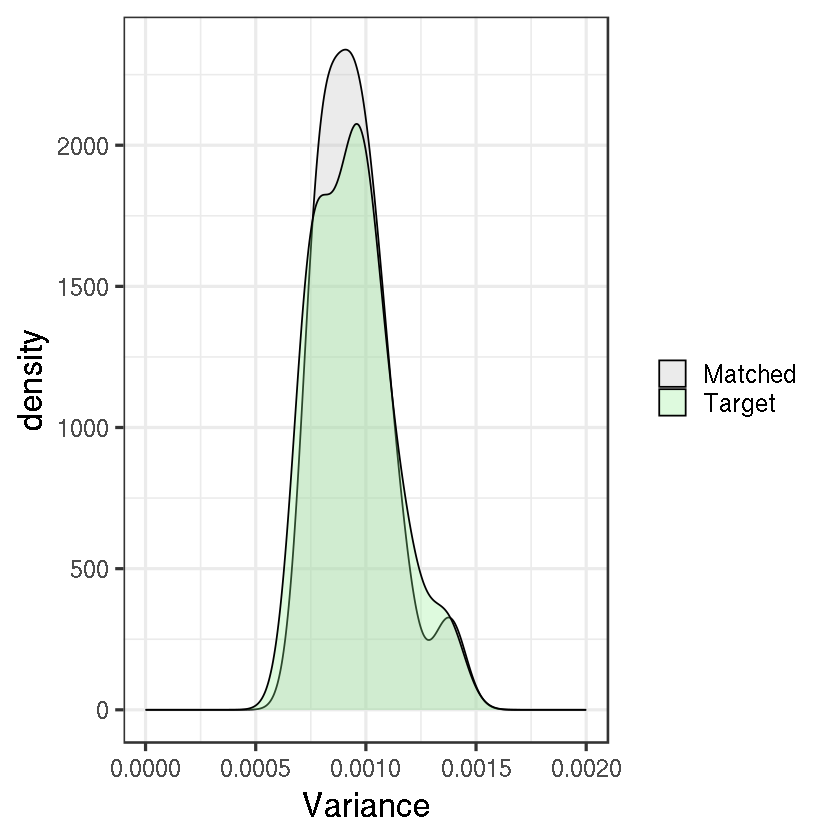

In [16]:
p = ggplot(stats, aes(x = variance, fill = SNP_Set)) +
    geom_density(alpha = 0.3) +
    xlim(0, 0.002) +
    xlab('Variance') + 
    theme_bw(base_size = 20) +
    scale_fill_manual(values = c('grey', 'light green')) +
    theme(legend.title=element_blank()) 
p
ggsave('../Figures/HAFVariance_Densities_TargetVMathced.pdf',p,  height = 10, width = 12)

Warning message in geom_histogram(alpha = 0.4, stat_bin = 5):
“Ignoring unknown parameters: `stat_bin`”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 4 rows containing missing values (`geom_bar()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 4 rows containing missing values (`geom_bar()`).”


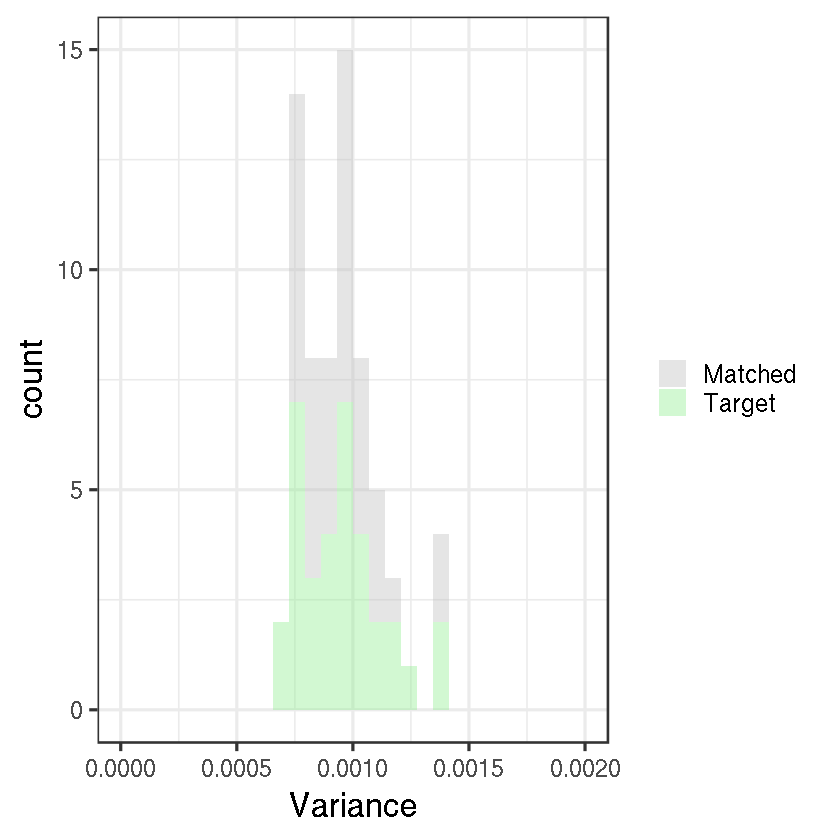

In [21]:
p = ggplot(stats, aes(x = variance, fill = SNP_Set)) +
    geom_histogram(alpha = 0.4, stat_bin = 5) +
    xlim(0, 0.002) +
    xlab('Variance') + 
    theme_bw(base_size = 20) +
    scale_fill_manual(values = c('grey', 'light green')) +
    theme(legend.title=element_blank()) 
p
ggsave('../Figures/HAFVariance_Histogram_TargetVMathced.pdf',p,  height = 10, width = 12)

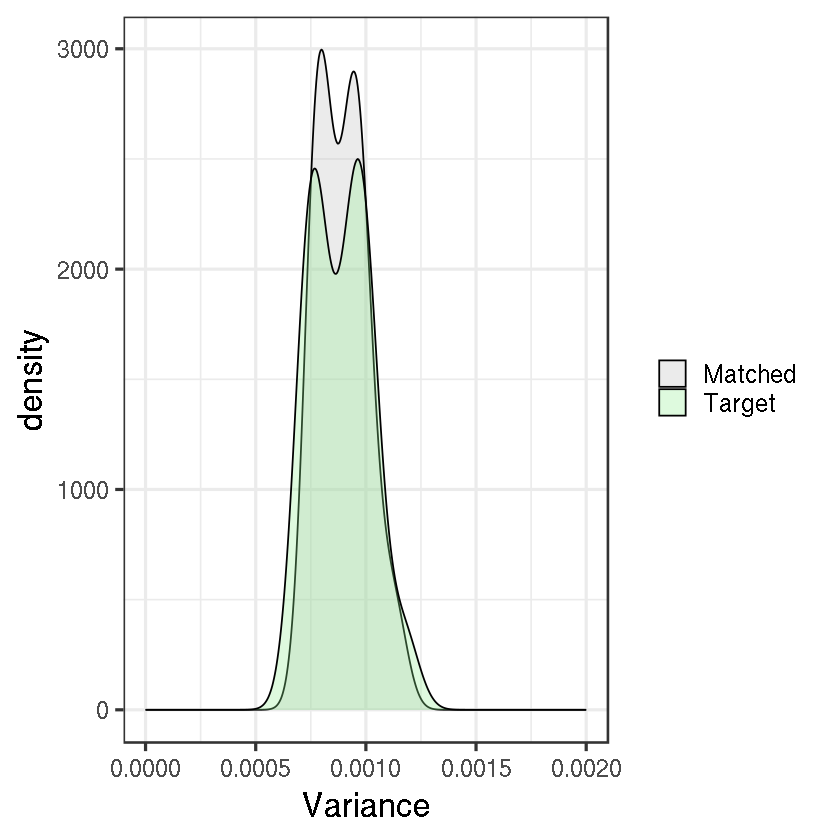

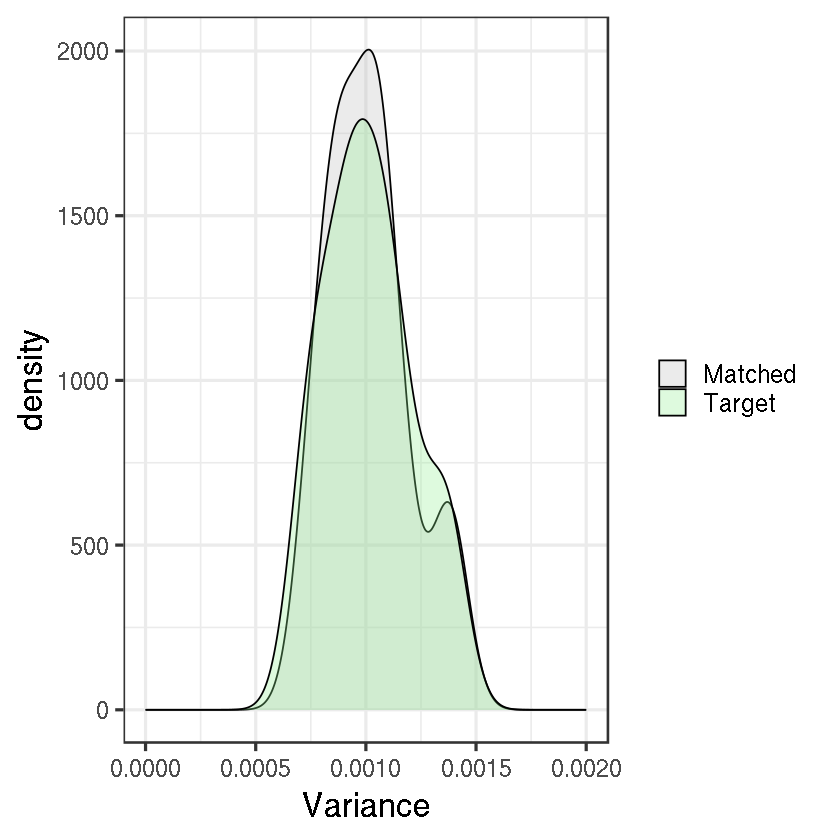

In [15]:
p = ggplot(stats %>% filter(test.tpt == 't3'), aes(x = variance, fill = SNP_Set)) +
    geom_density(alpha = 0.3) +
    xlim(0, 0.002) +
    xlab('Variance') + 
    theme_bw(base_size = 20) +
    scale_fill_manual(values = c('grey', 'light green')) +
    theme(legend.title=element_blank()) 
p
p = ggplot(stats %>% filter(test.tpt == 't11'), aes(x = variance, fill = SNP_Set)) +
    geom_density(alpha = 0.3) +
    xlim(0, 0.002) +
    xlab('Variance') + 
    theme_bw(base_size = 20) +
    scale_fill_manual(values = c('grey', 'light green')) +
    theme(legend.title=element_blank()) 
p

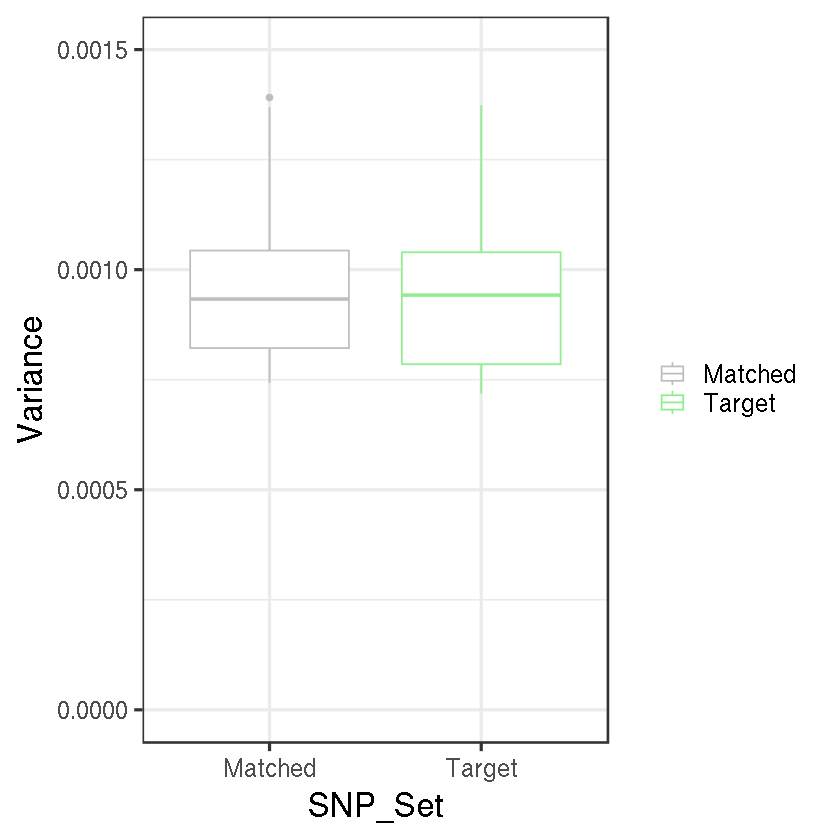

In [24]:
ggplot(stats, aes(x = SNP_Set, y = variance, colour = SNP_Set)) +
    geom_boxplot() +
    ylim(0, 0.0015) +
    ylab('Variance') + 
    theme_bw(base_size = 20) +
    scale_colour_manual(values = c('grey', 'light green')) +
    theme(legend.title=element_blank())


